In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

Task 1

In [3]:
np.random.seed(0)

In [4]:
n, p = 100, .5 
binomail = np.random.binomial(n, p, 10000)

In [5]:
Value=np.zeros(10000)*0.1 #avoid situtaion when total value is 0
"X is a binary vector of 0 and 1 of length 100 with binomial distribution"
"Value is a vector of 10000 sum of X"
for i in range(10000):    
    X=np.random.binomial(1, .5, 100)
    Value[i]=sum(X)
(V_mean,V_std)=np.mean(Value),np.std(Value)
print("the mean value is", V_mean,"the standard deviation is", V_std)

the mean value is 50.0949 the standard deviation is 5.00406774435


In [6]:
x = np.linspace(20, 100, 80)

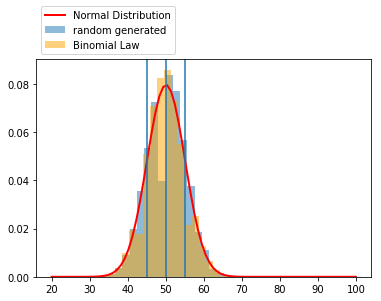

In [7]:
plt.hist(Value, bins=20, alpha=0.5,density='true',label='random generated')
plt.hist(binomail, bins=20,color='orange',alpha=0.5,density='true',label='Binomial Law')

plt.plot(x,norm.pdf(x, loc=V_mean, scale=V_std),'r-', lw=2,label='Normal Distribution')
plt.legend(bbox_to_anchor=(0,1, 1 ,0.1), loc=3,
           ncol=1)

#mean 𝜇 and the standard deviation 𝜎,
plt.axvline(x=V_mean)
plt.axvline(x=V_mean - V_std)
plt.axvline(x=V_mean + V_std)

plt.show()

Task 2


Here, consider an M-fold repetition of the random guess made in task 1. 
So, you simply draw an ensemble of M such bit strings (𝒙 1 , 𝒙 2 , … ), 
each with N bits, and evaluate the strings separately, 
which results in a tuple of M values (𝑉(𝒙 1 ), 𝑉(𝒙 2 ), … ). 
From this tuple, you pick the highest value.

I chose M=100;M=10

In [17]:
m=100

In [18]:
h =np.zeros(10000)
for i in range(10000):
    "have the sum vector from above, randomly pick m-fold index, \
    and take the max of m-fold, repeat 1000 times"
    y = np.zeros(m)
    for j in range(m):
        index = np.random.randint(0, 10000, 1)
        y[j] = Value[index]
    h[i]=np.max(y)
    


the mean value is 62.7392 the standard deviation is 2.25388184251


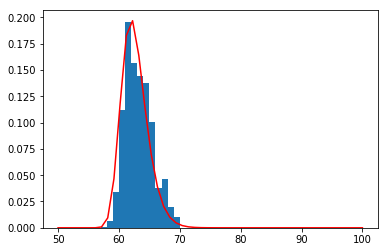

In [19]:

plt.hist(h,range=(50, 100),density='true',bins=50,label = '100tuples')
(h_mean,h_std)=np.mean(h),np.std(h)

x = np.linspace(50, 100, 50)
maxvalue_pdf = 100 * norm.pdf(x,loc=V_mean, scale=V_std) * (norm.cdf(x,loc=V_mean, scale=V_std) ** (100-1))

plt.plot(x, maxvalue_pdf,'r',label = 'Normal Distribution')

print("the mean value is", h_mean,"the standard deviation is", h_std)

The mean value is 62, when M=100

The mean value is around 59, when M=10

The original mean value is around 50